                        # EDA y ETL

### INGESTA DE DATOS y ANÁLISIS EXPLORATORIO INICIAL

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
train = pd.read_parquet('train.parquet')
test = pd.read_parquet("test.parquet")

In [128]:
train.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


In [129]:
train.shape

(346479, 22)

### ANÁLISIS DE DUPLICADOS

El rubro inmobiliario se caracteriza por una rotación lenta del inventario de una inmobiliaria, y usualmente se requieren múltiples y variadas ofertas del inmueble antes de concretar una venta. Esto me lleva a inferir exhaustivamente si existen inmuebles repetidos en el listado. 
Esto es importante porque en caso de haber repeticiones múltiples del mismo inmueble, el muestreo con el cual entrenaré mi modelo estará fuertemente sesgado.

In [130]:
train.duplicated().sum()

0

Este resultado no es confiable, ya que sólo arrojará resultados si todas las columnas de un registro son iguales a otra.

Buscando valores duplicados en la descripción, veo que hay muchísimos registros repetidos, ya que la descripción puede ser modificada en distintos avisos para una misma propiedad. Con esto confirmamos la hipótesis inicial que habíamos planteado al inicio de este apartado.

In [131]:
train.duplicated(subset = ['description']).sum()

91488

In [132]:
train.duplicated(subset = ['url']).sum()

0

In [133]:
train.duplicated(subset = ['image_url']).sum()

178233

Este dato es clave. Una descripción se puede modificar, pero si remite a la misma url de la foto, hace referencia a la misma propiedad. Bajo este criterio de identificacion de duplicados, una gran parte de la muestra correspondería a propiedades repetidas.

Voy a chequear los valores que toma la columa 'image_url'

In [134]:
train['image_url'].value_counts()

https://images.craigslist.org/00R0R_ciYsssEFReq_600x450.jpg    363
https://images.craigslist.org/00q0q_bgmgyW6dLsd_600x450.jpg    345
https://images.craigslist.org/00X0X_XsEWPFYKuV_600x450.jpg     197
https://images.craigslist.org/01515_6IPWDkQhlPM_600x450.jpg    196
https://images.craigslist.org/00F0F_lD8FY29OOt4_600x450.jpg    196
                                                              ... 
https://images.craigslist.org/00m0m_9CJQRKgOE97_600x450.jpg      1
https://images.craigslist.org/00e0e_adxNPziRBFG_600x450.jpg      1
https://images.craigslist.org/00w0w_5hwofMx2HD6_600x450.jpg      1
https://images.craigslist.org/00f0f_iE2klsZWnEi_600x450.jpg      1
https://images.craigslist.org/00w0w_7irvBxq409N_600x450.jpg      1
Name: image_url, Length: 168246, dtype: int64

Para corroborar la hipótesis de valores repetidos, voy a evaluar para el primer resultado, si existen motivos por los cuales inferir sin margen de error que se trata de la misma propiedad.

In [135]:
train[(train['image_url']== 'https://images.craigslist.org/00R0R_ciYsssEFReq_600x450.jpg')]

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
198,7046739043,https://ksu.craigslist.org/apa/d/manhattan-mag...,manhattan,https://ksu.craigslist.org,735,apartment,800,2,1.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
510,7043528535,https://ksu.craigslist.org/apa/d/manhattan-mag...,manhattan,https://ksu.craigslist.org,695,apartment,700,0,1.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
2552,7041806587,https://ksu.craigslist.org/apa/d/manhattan-don...,manhattan,https://ksu.craigslist.org,825,apartment,850,2,2.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
3209,7043536382,https://ksu.craigslist.org/apa/d/manhattan-don...,manhattan,https://ksu.craigslist.org,825,apartment,850,2,2.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
3710,7035290826,https://ksu.craigslist.org/apa/d/manhattan-mag...,manhattan,https://ksu.craigslist.org,720,apartment,750,1,1.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337619,7044496004,https://ksu.craigslist.org/apa/d/manhattan-mag...,manhattan,https://ksu.craigslist.org,735,apartment,825,2,1.5,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
338020,7047338260,https://ksu.craigslist.org/apa/d/manhattan-mag...,manhattan,https://ksu.craigslist.org,695,apartment,700,0,1.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
341777,7047342887,https://ksu.craigslist.org/apa/d/manhattan-don...,manhattan,https://ksu.craigslist.org,1085,apartment,950,3,1.5,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks
342812,7028881796,https://ksu.craigslist.org/apa/d/manhattan-mag...,manhattan,https://ksu.craigslist.org,720,apartment,750,1,1.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00R0R_ciYsssEFRe...,Contact us today at show contact info Depo...,39.1937,-96.5747,ks


Podemos corroborar que las publicaciones corresponden al mismo inmueble debido a que referencian la misma ubicación fisica (lo cual deduzco por los valores de la columna latitud y longitud).
Este hallazgo en el EDA es clave, ya que vemos que hay muchísimas propiedades repetidas en el dataset con diversos valores de las variables que utilizaremos posteriormente para entrenar nuestro modelo.

Procedo a ubicar los inmuebles repetidos según su ubicación.

In [136]:
train.duplicated(subset = ['lat','long']).sum()

272239

In [137]:
train.duplicated(subset = ['lat']).sum()

292656

In [138]:
train.duplicated(subset = ['long']).sum()

295349

Podemos estar seguros que 272239 registros están duplicados, ya que tanto latitud como longitud coinciden.
En los otros casos, observamos el fenómeno de que tal vez dos casas en venta se encuentran sobre la misma calle en otra altura de la misma.
Asi mismo puede ocurrir que sean errores de tipeo al cargar los datos y que se trate de la misma propiedad. De ser así, podríamos tendríamos 2693 registros repetidos. Al ser un error de menos del 1% del tamaño del dataset, decidiremos dejar esos posibles registros duplicados.

Veo que este resultado es mayor por la existencia de propiedades con valores de lat y long incompletos en el dataset.
Sin embargo son solo 1722 registros sin dato en lat y/o long, por lo cual puedo inferir que este criterio de identifiación de repetidos agrega otros registros que antes no había detectado.

In [139]:
train[train.duplicated(subset = ['lat','long'])].sort_values(by = ['lat','long'])

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
95108,7045429590,https://milwaukee.craigslist.org/apa/d/hales-c...,milwaukee,https://milwaukee.craigslist.org,1290,apartment,1300,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00606_5KY5uujn3M...,Spacious 1300sq. feet of Beautifulness! Locat...,2.83091,-2.83100,wi
205401,7046420697,https://milwaukee.craigslist.org/apa/d/brand-n...,milwaukee,https://milwaukee.craigslist.org,1779,apartment,1167,2,2.0,1,...,1,0,0,w/d in unit,attached garage,https://images.craigslist.org/00G0G_bZzm0ZVjm2...,BRAND NEW BEAUTIFUL 1167 sq. ft. 2 bedroom 2 b...,2.93300,-2.93308,wi
249201,7046439656,https://milwaukee.craigslist.org/apa/d/brand-n...,milwaukee,https://milwaukee.craigslist.org,1415,apartment,849,1,1.0,1,...,1,0,0,w/d in unit,attached garage,https://images.craigslist.org/00N0N_hYxDE2kPEJ...,LAST TOP FLOOR 1 BEDROOM LUXURY APARTMENT! DON...,2.93300,-2.93308,wi
255548,7049621153,https://atlanta.craigslist.org/sat/apa/d/start...,atlanta,https://atlanta.craigslist.org,1167,apartment,1236,2,2.0,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/01010_koNjcxMPhh...,Welcome Home to Terraces at Fieldstone Perched...,16.13160,-16.13160,ga
123237,7044960839,https://honolulu.craigslist.org/big/apa/d/capt...,hawaii,https://honolulu.craigslist.org,2500,house,1600,3,2.0,0,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00Y0Y_chMSTc2DBG...,Three bedroom two bathroom home has Solar 8 mi...,19.32060,-155.81000,hi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345789,7040091805,https://toledo.craigslist.org/apa/d/newly-list...,toledo,https://toledo.craigslist.org,650,house,1624,3,1.0,0,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/01212_8hvuiDxMoS...,Large 3BR with Large lot -> 2-car garage with ...,NaN,NaN,oh
345847,7033042711,https://huntsville.craigslist.org/apa/d/come-s...,huntsville / decatur,https://huntsville.craigslist.org,739,apartment,640,1,1.0,1,...,0,0,0,laundry in bldg,off-street parking,https://images.craigslist.org/00h0h_2eRBbtCoKb...,The Preserve at Crestwood\t ...,NaN,NaN,al
345856,7049041897,https://lubbock.craigslist.org/apa/d/completel...,lubbock,https://lubbock.craigslist.org,606,apartment,627,1,1.0,0,...,0,0,0,None,None,https://images.craigslist.org/00101_90L80OdQQ5...,If you like it and want to rent this please TE...,NaN,NaN,tx
345995,7043301388,https://sarasota.craigslist.org/apa/d/large-ho...,sarasota-bradenton,https://sarasota.craigslist.org,1800,house,2300,2,1.0,0,...,0,0,1,w/d hookups,off-street parking,https://images.craigslist.org/00n0n_9p9IpPtxL0...,We have a beautiful 2 large bedroom 1 bath hom...,NaN,NaN,fl


Casualmente podemos apreciar como el 2do y 3er registro pertenecen a la misma propiedad en Milwakee, a la cual le realizaron reformas agregándole un baño y un cuarto, incrementando así su precio.

El criterio de eliminación de duplicados elegido, será eliminar los registros con la misma descripción, o con misma image_url o la misma ubicación (siendo evidentemente éste último el más potente). Sin embargo es óptimo utilizar los tres simultáneamente ya que puede ocurrir que al publicar se haya modificado o tipeado mal las coordenadas de la ubicación, y en ese caso maximizo el criterio de filtración al considerar los otros dos criterios.

In [140]:
train.drop_duplicates(subset='description', inplace=True)

In [141]:
train.drop_duplicates(subset='image_url', inplace=True)

En el criterio puntual de la  eliminación de duplicados por ubicación, considero no eliminar los registros que no cuentan con datos de coordenadas. Para ello voy a llevar esos 842 registros a otro dataframe, eliminaré todos los repetidos de la tabla original y luego concatenaré las tablas nuevamente.

In [142]:
train[['lat','long']].isnull().sum()

lat     842
long    842
dtype: int64

In [143]:
train.shape

(149363, 22)

Agrupo los registros con los valores NaN al fondo del dataframe, y restando de la totalidad de registros la cantidad de NaN puedo ubicar desde que punto separarlo para posteriormente llevarme ese split a otro dataframe.

In [144]:
train = train.sort_values(by=['lat'])   

In [145]:
train.iloc[148520:,:].head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
206167,7042543342,https://batonrouge.craigslist.org/apa/d/have-h...,baton rouge,https://batonrouge.craigslist.org,980,apartment,1236,3,2.0,0,...,0,0,0,None,None,https://images.craigslist.org/00l0l_edbq7NVssI...,Live Oak Trace offers the comfortable living e...,102.036,-147.579,la
62,7030417516,https://worcester.craigslist.org/apa/d/fabulou...,worcester / central MA,https://worcester.craigslist.org,1450,townhouse,1100,2,2.0,0,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00x0x_fAVcu5GCTQ...,A must see. Elegant quiet 2-level townhouse. R...,NaN,NaN,ma
369,7046724271,https://grandrapids.craigslist.org/apa/d/walk-...,grand rapids,https://grandrapids.craigslist.org,1165,apartment,892,2,1.5,1,...,0,0,0,w/d hookups,None,https://images.craigslist.org/00303_beCkh2Surq...,VIEW OUR WEBSITE: http://www.clearpointvalley...,NaN,NaN,mi
501,7046978803,https://denver.craigslist.org/apa/d/1-months-f...,denver,https://denver.craigslist.org,2456,apartment,932,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00C0C_6ftesj1piw...,Welcome to Downtown Denvers FIRST Super LUXURY...,NaN,NaN,co
841,7044475894,https://columbia.craigslist.org/apa/d/view-our...,columbia,https://columbia.craigslist.org,975,apartment,964,2,2.0,1,...,1,0,0,w/d in unit,None,https://images.craigslist.org/01111_5hLMmx4Rdk...,This beautiful gated community is located in C...,NaN,NaN,sc


Me llevo los valores nulos a otro df para no eliminarlos cuando borre los duplicados.

In [146]:
df_nan = train.iloc[148521:,:]

In [147]:
df_nan.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
62,7030417516,https://worcester.craigslist.org/apa/d/fabulou...,worcester / central MA,https://worcester.craigslist.org,1450,townhouse,1100,2,2.0,0,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00x0x_fAVcu5GCTQ...,A must see. Elegant quiet 2-level townhouse. R...,NaN,NaN,ma
369,7046724271,https://grandrapids.craigslist.org/apa/d/walk-...,grand rapids,https://grandrapids.craigslist.org,1165,apartment,892,2,1.5,1,...,0,0,0,w/d hookups,None,https://images.craigslist.org/00303_beCkh2Surq...,VIEW OUR WEBSITE: http://www.clearpointvalley...,NaN,NaN,mi
501,7046978803,https://denver.craigslist.org/apa/d/1-months-f...,denver,https://denver.craigslist.org,2456,apartment,932,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00C0C_6ftesj1piw...,Welcome to Downtown Denvers FIRST Super LUXURY...,NaN,NaN,co
841,7044475894,https://columbia.craigslist.org/apa/d/view-our...,columbia,https://columbia.craigslist.org,975,apartment,964,2,2.0,1,...,1,0,0,w/d in unit,None,https://images.craigslist.org/01111_5hLMmx4Rdk...,This beautiful gated community is located in C...,NaN,NaN,sc
976,7046827868,https://sarasota.craigslist.org/apa/d/rent-lov...,sarasota-bradenton,https://sarasota.craigslist.org,1800,house,2300,2,1.0,0,...,0,0,1,w/d hookups,attached garage,https://images.craigslist.org/00c0c_4lT5jOKmN7...,We have a beautiful 2 large bedroom 1bath home...,NaN,NaN,fl


In [148]:
train.drop_duplicates(subset = ['lat','long'] , inplace = True)

In [149]:
train.shape

(63527, 22)

In [150]:
train = train.append(df_nan)

C:\Users\VAIO\AppData\Local\Temp\ipykernel_2896\3443042328.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(df_nan)


Verifico que se sumaron los 842 registros.

In [151]:
train.shape

(64369, 22)

Así unificamos el dataframe nuevamente y ahora contamos con una muestra libre de duplicados. Haber pasado por alto este paso de EDA hubiera sido trágico para nuestras aspiraciones de entrenar un modelo que nos diera concusiones claras.

### ANÁLISIS DE FALTANTES

In [152]:
train.isnull().sum()

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options             8362
parking_options            14081
image_url                      0
description                    0
lat                          843
long                         843
state                          0
dtype: int64

*parking_options*

Los datos faltantes representan el 21.75% de los datos de la prueba. Voy a tomar la decisión de no asignarlos a categoríá alguna, ya que sesgarían considerablemente la distribución hacia esa categoría y les daré el valor de 'NA' (not available).

In [153]:
train['parking_options'].value_counts()

off-street parking    23735
attached garage       12096
carport                5948
detached garage        4052
street parking         3993
no parking              388
valet parking            76
Name: parking_options, dtype: int64

In [154]:
train[train['parking_options']==None]

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state


In [155]:
train['parking_options'].fillna('NA',inplace=True)

*laundry_options*

Seguiremos el mismo criterio que en el caso ut-supra.

In [156]:
train['laundry_options'].value_counts()

w/d in unit           24527
w/d hookups           13640
laundry on site        8078
laundry in bldg        7997
no laundry on site     1765
Name: laundry_options, dtype: int64

In [157]:
train['laundry_options'].fillna('NA',inplace=True)

### *ANÁLISIS DE VARIABLES - DISTRIBUCIÓN, CORRELACIÓN Y BUSQUEDA DE OUTLIERS*

Ante todo realizaré un histograma de todas las variables para tener un pantallazo general de la situacíon. Hay variables que no figurarán en los plots, debido a que son categóricas. Más adelante abordaremos esa temática y luego plantearemos un plot con las variables "pulidas".

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'sqfeet'}>,
        <AxesSubplot: title={'center': 'beds'}>],
       [<AxesSubplot: title={'center': 'baths'}>,
        <AxesSubplot: title={'center': 'cats_allowed'}>,
        <AxesSubplot: title={'center': 'dogs_allowed'}>,
        <AxesSubplot: title={'center': 'smoking_allowed'}>],
       [<AxesSubplot: title={'center': 'wheelchair_access'}>,
        <AxesSubplot: title={'center': 'electric_vehicle_charge'}>,
        <AxesSubplot: title={'center': 'comes_furnished'}>,
        <AxesSubplot: title={'center': 'lat'}>],
       [<AxesSubplot: title={'center': 'long'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

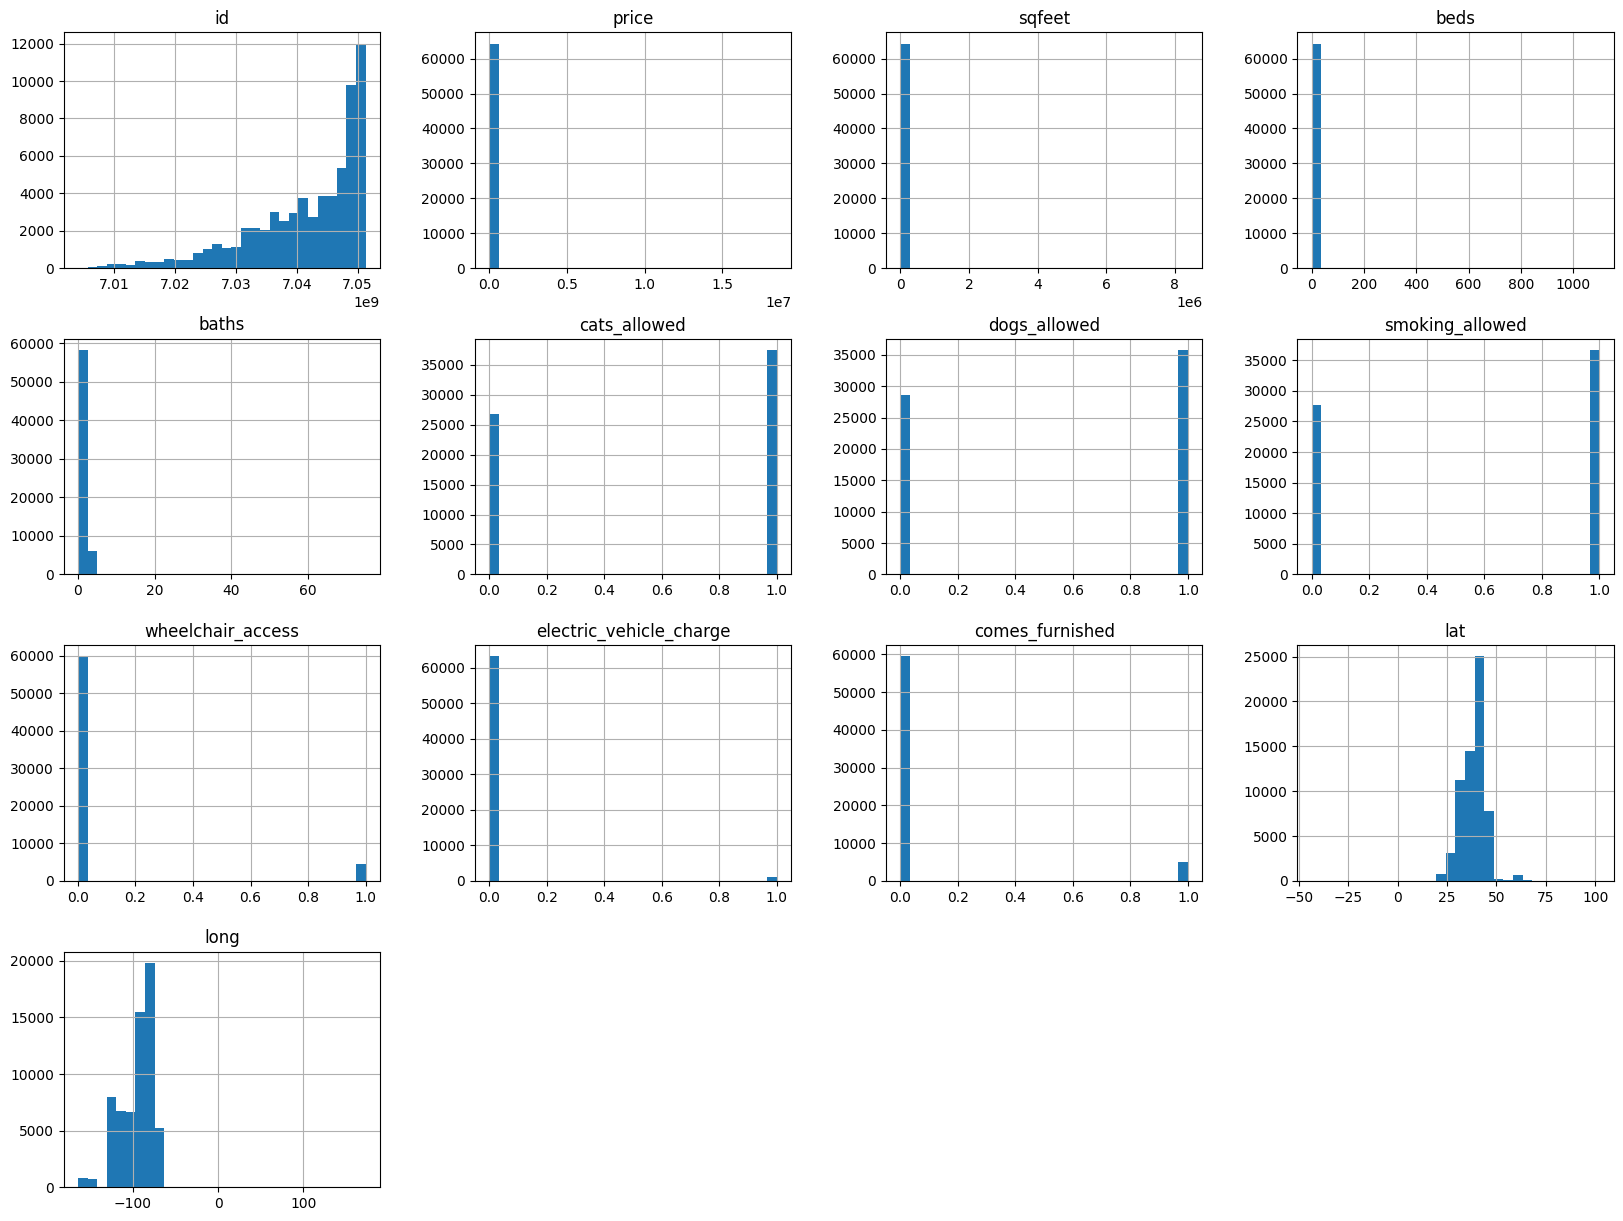

In [158]:
train.hist(bins=30 , figsize=(20,15))

Este gráfico general sirve para tener un panorama de la distribución de los datos y trazar una dirección de trabajo. A primera vista, vemos que las variables dummies demuestran la distribución esperada. Corroboraremos que todos sus datos son efectivamente 0 o 1.

In [159]:
train['cats_allowed'].value_counts()

1    37496
0    26873
Name: cats_allowed, dtype: int64

In [160]:
train['dogs_allowed'].value_counts()

1    35770
0    28599
Name: dogs_allowed, dtype: int64

In [161]:
train['smoking_allowed'].value_counts()

1    36692
0    27677
Name: smoking_allowed, dtype: int64

In [162]:
train['wheelchair_access'].value_counts()

0    59857
1     4512
Name: wheelchair_access, dtype: int64

In [163]:
train['comes_furnished'].value_counts()

0    59453
1     4916
Name: comes_furnished, dtype: int64

In [164]:
train['electric_vehicle_charge'].value_counts()

0    63173
1     1196
Name: electric_vehicle_charge, dtype: int64

Por otra parte, en las demás variables puedo inferir debido al tamaño de las escalas, que en varias de ellas tenemos la presencia de outliers.
Procederemos a trabajar sobre cada una de las variables de forma individual.

*Variable price*

La consigna pide implementar una transformación en el Dataframe en la cual se debe agregar una columna categórica que clasifique los precios de las propiedades en low, medium y high. Procedo a hacerlo ahora para dejar el Dataframe listo.

In [165]:
train.loc[train['price'] == 'NA']

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state


Elimino todos los valores 'NA' encontrados.

In [166]:
train.drop(train[train['price'] == 'NA'].index , inplace=True)

Debido a cambios en las especificaciones del pedido, aquellos registros en los cuales la columna price tome valores inferiores a 1000, llevarán el valor category_price de 1. Los demás valores llevarán el valor cero.

In [167]:
condiciones = [(train['price'] <= 999) , (train['price'] > 999)]
valores = ['1','0']
train['category_price'] = np.select(condiciones, valores)

In [168]:
train['category_price'].value_counts()

0    40058
1    24311
Name: category_price, dtype: int64

<AxesSubplot: ylabel='price'>

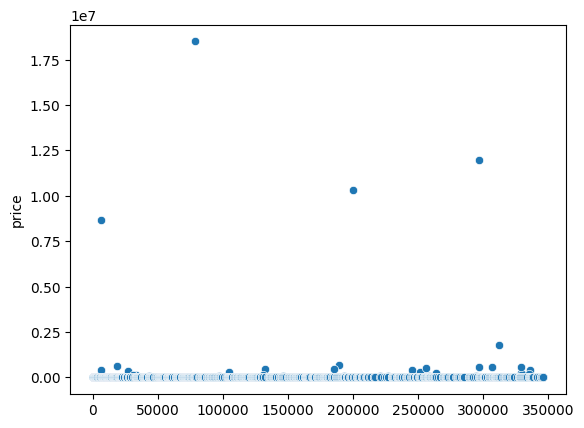

In [169]:
sns.scatterplot(train['price'])

Facilmente podemos identificar que hay valores que están totalmente por fuera de los valores de la realidad. Vamos a identificarlos y evaluarlos.

In [170]:
train[train['price'] > 500000].shape[0]

11

Algunas de esas propiedades podrían efectivamente tener ese valor de mercado. Sin embargo, como son pocas, las separaré de la muestra.

In [171]:
train.drop(train[train['price'] > 500000].index , inplace=True)

Liberados de los outliers extremadamente grandes, podemos ver ahora los valores realmente bajos.

In [172]:
train['price'].sort_values()

137726         0
76545          0
139194         0
199881         0
37743          0
           ...  
245764    391000
336190    409429
6288      430000
132544    450000
185615    479000
Name: price, Length: 64358, dtype: int64

In [173]:
train.loc[train['price'] == 0].shape[0]

205

Reemplazo los valores en cero por la mediana de la distribución. Son pocos valores y no afectará significativamente a la muestras.

In [174]:
train.loc[train['price'] == 0] = train['price'].median()

*Variable sqfeet*

<AxesSubplot: ylabel='sqfeet'>

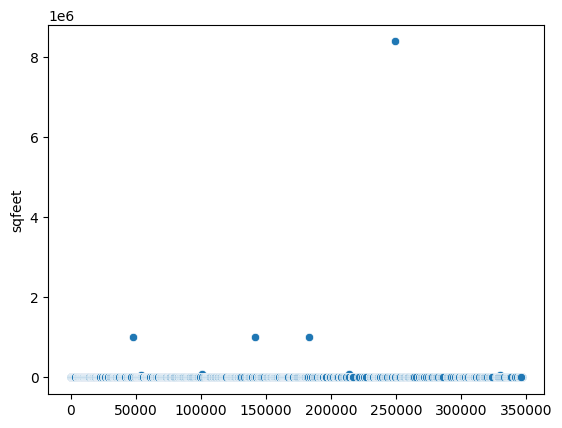

In [175]:
sns.scatterplot(train['sqfeet'])

In [176]:
train['sqfeet'].sort_values(ascending=False)

249237    8388607
141803    1019856
47651     1019856
183230     999999
100773      99204
           ...   
82353           0
124652          0
285026          0
181344          0
187054          0
Name: sqfeet, Length: 64358, dtype: int64

In [177]:
train.drop(train[train['sqfeet'] > 500000].index , inplace=True)

Cuento cuantos valores son cero. Al ver que son 20, para no perder los registros, decido completarlos con la mediana de la distribución.

In [178]:
train.loc[train['sqfeet'] == 0].shape[0]

19

In [179]:
train.loc[train['sqfeet'] == 0] = train['sqfeet'].median()

*Variable beds*

<AxesSubplot: ylabel='beds'>

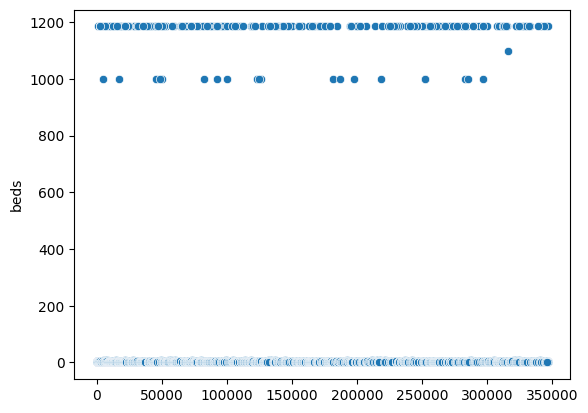

In [180]:
sns.scatterplot(train['beds'])

In [181]:
train['beds'].sort_values(ascending=False)

166418    1185
324614    1185
64902     1185
343812    1185
132791    1185
          ... 
337648       0
343268       0
78652        0
306252       0
104151       0
Name: beds, Length: 64354, dtype: int64

In [182]:
train['beds'].value_counts()

2       24909
1       16187
3       15520
4        4088
0        1943
5        1327
1185      205
6         115
7          26
1000       20
8          13
1100        1
Name: beds, dtype: int64

Veo que hasta 8 habitaciones, es algo lógico. Los valores por encima de 1000 son errores de carga y los reemplazaré por 1 (un habitación).

In [183]:
train.loc[train['beds'] >= 1000] = 1

*Variable baths*

<AxesSubplot: ylabel='baths'>

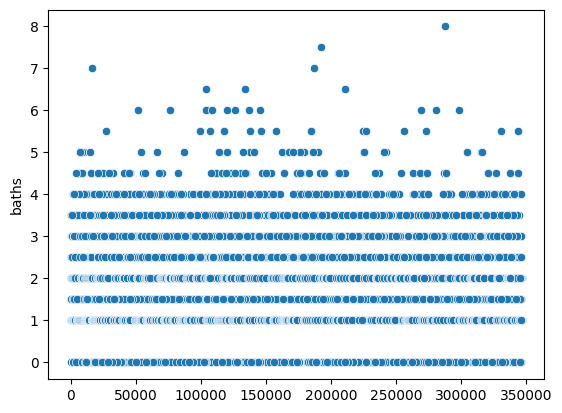

In [184]:
sns.scatterplot(train['baths'])

In [185]:
train['baths'].value_counts()

1.0    33488
2.0    19254
1.5     4946
2.5     3890
3.0     1404
0.0      595
3.5      417
4.0      242
4.5       58
5.0       27
5.5       15
6.0       11
6.5        3
7.0        2
7.5        1
8.0        1
Name: baths, dtype: int64

Todo parece estar bajo control y correcto con esta variable. Suele considerarse el 0.5 que acompaña al valor entero del baño como un antebaño.

*Variables lat y long*

Ya hemos trabajado previamente de forma exhaustiva sobre este campo cuando realizamos la limpieza de duplicados. Ahora veremos sobre un mapa la distribución de las coordenadas para identificar la distribución geográfica de la muestra.

<AxesSubplot: xlabel='lat', ylabel='long'>

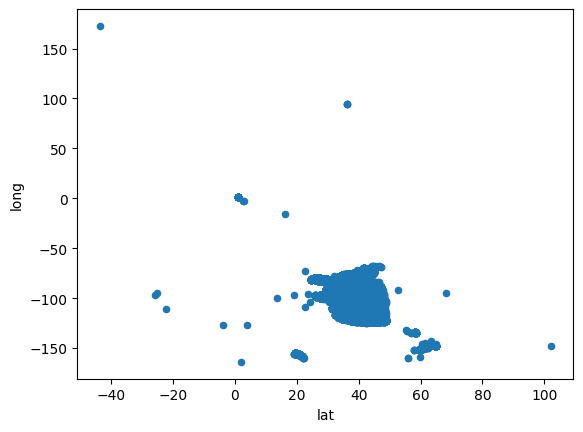

In [186]:
train.plot(kind='scatter', x='lat',y='long')

Vemos que posiblemente tengamos algún valor que no se corresponde con el territorio de USA. Para estar seguros, trabajaré en un anexo a este cuaderno llamado "mapa.ipynb" para optimizar el trabajo, ya que debo renunciar a varias columnas sin valores de ubicación para plottear el mapa.

In [187]:
df_mapa = train

In [188]:
df_mapa.to_csv('dfm.csv')

Con los datos obtenidos en el cuaderno auxiliar, procedemos a eliminar los registros considerados outliers.

In [189]:
train.drop(train[train['price'] == 'NA'].index , inplace=True)

In [190]:
train.shape[0]

64354

In [191]:
train.drop(train[train['lat'] > 67.2264].index , inplace=True)
train.drop(train[train['lat'] < 20.6973].index , inplace=True)
train.drop(train[train['long'] > -60.4121].index , inplace=True)
train.drop(train[train['long'] < -154.2793].index , inplace=True)

Efectivamente corroboramos que los outliers fueron correctamente eliminados.

In [192]:
train.shape[0]

63297

### *TRATAMIENTO DE VARIABLES CATEGÓRICAS*

El modelo nos provee 6 variables categóricas: state, type, region, region url, url y description. Las últimas tres hacen referencia a cuestiones operativas de la publicación del aviso de venta de la propiedad, por lo cual son irrelevante para el modelo y por ello las elimino directamente para disminuir el llamado Efecto Hughes.
Respecto de las primeras 3 variables, infiero que pueden ser importantes, aunque a priori sospecho que state y region son redundantes.
Una vez pulida la data, transformaré las columnas categóricas a valores numéricos para disponibilizarlos para análisis posterior.

*Variable type*

In [193]:
train['type'].value_counts()


apartment          38474
house              14031
townhouse           3376
condo               2818
duplex              2463
manufactured        1282
cottage/cabin        382
flat                 198
loft                 177
in-law                89
land                   5
assisted living        2
Name: type, dtype: int64

In [194]:
train.loc[train['type'] == 1] = 'NA'

<AxesSubplot: ylabel='type'>

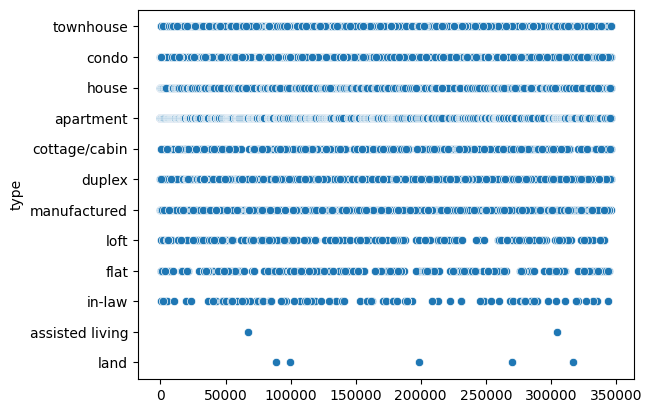

In [195]:
sns.scatterplot(train['type'])

Vemos que habían valores numéricos, lo cual no permite relizar el scatterplot cuando tenemos valores str de categorías. Normalizados los datos a 'NA' podemos visualizar que la variable está en condiciones de ser trasnformada de categóricas a numéricas.
Para ello utilizaré el módulo preprocessing de scykitlearn.

In [197]:
train['type_le'] = le.fit_transform(train['type']) 

Aquí tengo la tabla de referencias del valor numérico de cada variable.

In [198]:
train.loc[:,['type_le','type']].value_counts()

type_le  type           
0        apartment          38474
6        house              14031
11       townhouse           3376
2        condo               2818
4        duplex              2463
10       manufactured        1282
3        cottage/cabin        382
5        flat                 198
9        loft                 177
7        in-law                89
8        land                   5
1        assisted living        2
dtype: int64

*Variable state*

<AxesSubplot: >

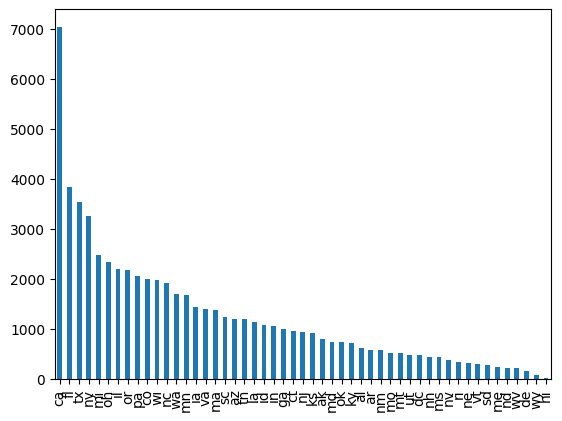

In [199]:
train['state'].value_counts().plot(kind='bar')

In [200]:
train['state'].value_counts()

ca    7042
fl    3837
tx    3548
ny    3256
mi    2472
oh    2340
il    2195
or    2183
pa    2061
co    2003
wi    1973
nc    1910
wa    1694
mn    1688
ia    1434
va    1394
ma    1377
sc    1230
az    1197
tn    1191
la    1147
id    1082
in    1050
ga     999
ct     957
nj     932
ks     921
ak     804
md     747
ok     746
ky     719
al     622
ar     577
nm     576
mo     519
mt     517
ut     475
dc     473
nh     437
ms     434
nv     384
ri     335
ne     325
vt     291
sd     285
me     238
nd     220
wv     213
de     153
wy      85
hi       9
Name: state, dtype: int64

Actualmente USA cuenta con 69 estados, considerando todo su territorio.

In [201]:
estados = pd.read_excel('Estados_USA.xlsx')
estados.head()

,Estado,Código
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [202]:
estados.shape[0]

69

Verifico que los valores únicos de los códigos de los estados no sean más que los estados que realmente existen.

In [203]:
train['state'].unique().size

51

Ahora genero dos arrays, uno con los nombres de los códigos de los estados de mi muestra y otro con los códigos de los nombres que realmente existen.
Posteriormente verifico que no haya algún nombre que no corresponda.

In [204]:
a = train['state'].str.upper().sort_values().unique()
a

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [205]:
b = estados['Código'].sort_values().unique()
b

array(['AA', 'AB', 'AE', 'AK', 'AL', 'AP', 'AR', 'AZ', 'BC', 'CA', 'CO',
       'CT', 'Código', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MB', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NB', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NL', 'NM', 'NS',
       'NT', 'NU', 'NV', 'NY', 'OH', 'OK', 'ON', 'OR', 'PA', 'PE', 'QC',
       'RI', 'SC', 'SD', 'SK', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY', 'YT', nan], dtype=object)

In [206]:
def sublista(a, b):
    return [x for x in a if x not in b]

sublista(a,b)

[]

Vemos que el único valor que no corresponde a la lista de estados es el valor 'NA', que se refiere a los not-available de nuestra muestra. Por lo tanto los valores del campo state son todos correctos.

*Variable region*

A priori al graficar la data en un barplot puedo ver una distribución muy similar a los datos de la columna state, lo cual en principio es una señal en favor de aceptar que las variables son redundantes, por obvias razones.

<AxesSubplot: >

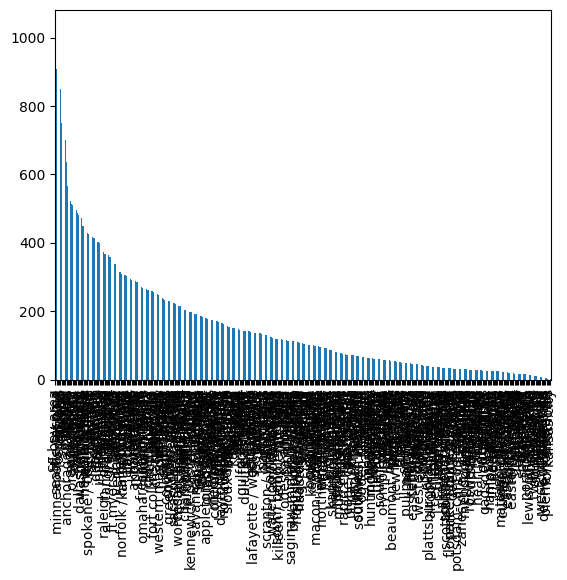

In [207]:
train['region'].value_counts().plot(kind='bar')

Si plotemos un gráfico de dispersión de ambas variables, podemos ver que existe una fuerte correlación entre ambas. Las dispersiones que se ven por fuera del claro agrupamiento vertical que se nota a la izquierda del gráfico, se deben a las siguientes razones:
* Hay estados que se encuentran en diversas regiones.
* Hay regiones que abarcan diversos estados.

<AxesSubplot: xlabel='region', ylabel='state'>

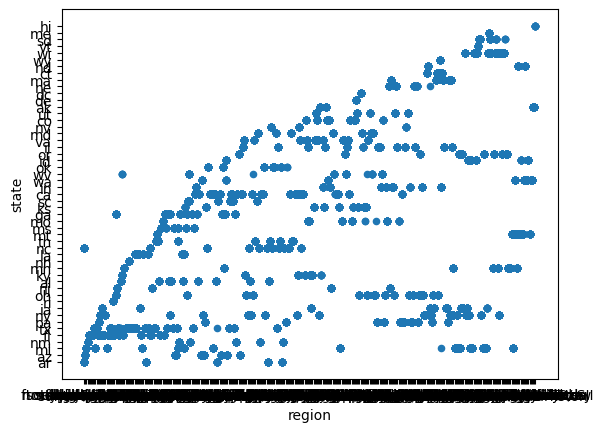

In [208]:
train.plot(kind='scatter', x='region',y='state')

Considerando que las variables son claramente redundantes, voy a elegir trabajar con la categoría state. El motivo por el cual hago esto es que la categoríá region es muy extensa, muchas veces arbitraria y de barreras difusas. Por otra parte, considero que la informacíón por estado es más específica y útil para el anáisis y la toma de decisiones.

In [209]:
train['region'].size

63297

### *TRANSFORMACIÓN DE VARIABLES CATEGÓRICAS A NUMÉRICAS*

A continuación procedo a transformar el resto de las variables categóricas a numéricas, tal como hice antes con la variable type. Las variables son:

* laundry_options
* parking_options
* state

Luego de cada transformación confirmo la creación de la variable y el valor numérico correspondiente a cada categoría.

In [210]:
train['laundry_options_le'] = le.fit_transform(train['laundry_options']) 

In [211]:
train.loc[:,['laundry_options_le','laundry_options']].value_counts()

laundry_options_le  laundry_options   
5                   w/d in unit           24070
4                   w/d hookups           13560
0                   NA                     8274
1                   laundry in bldg        7855
2                   laundry on site        7793
3                   no laundry on site     1745
dtype: int64

In [212]:
train['parking_options_le'] = le.fit_transform(train['parking_options']) 

In [213]:
train.loc[:,['parking_options_le','parking_options']].value_counts()

parking_options_le  parking_options   
5                   off-street parking    23418
0                   NA                    13905
1                   attached garage       11841
2                   carport                5743
3                   detached garage        4012
6                   street parking         3932
4                   no parking              374
7                   valet parking            72
dtype: int64

In [214]:
train['state_le'] = le.fit_transform(train['state']) 

In [215]:
train.loc[:,['state_le','state']].value_counts()

state_le  state
4         ca       7042
9         fl       3837
43        tx       3548
34        ny       3256
22        mi       2472
35        oh       2340
14        il       2195
37        or       2183
38        pa       2061
5         co       2003
48        wi       1973
27        nc       1910
47        wa       1694
23        mn       1688
12        ia       1434
45        va       1394
19        ma       1377
40        sc       1230
3         az       1197
42        tn       1191
18        la       1147
13        id       1082
15        in       1050
10        ga        999
6         ct        957
31        nj        932
16        ks        921
0         ak        804
20        md        747
36        ok        746
17        ky        719
1         al        622
2         ar        577
32        nm        576
24        mo        519
26        mt        517
44        ut        475
7         dc        473
30        nh        437
25        ms        434
33        nv        384


## *ESPECIFICACIÓN DEL MODELO*

En este apartado tomaré las decisiones que como científico de datos debo realizar a la hora de optimizar mi módelo. Considero que el trabajo de EDA, ETL y especificación del modelo es una vital del proceso. Pequeñas decisiones en estas etapas del workflow pueden causar estragos en las previsiones posteriores del modelo.

Inicialmente voy a prescindir de varias columnas, muchas de las cuales he anticipado en el desarrollo del paper. El objetivo de esta etapa, es preparar un Dataset apropiado para la posterior profundización de la especificación del proceso, en función de los objetivos de los dos modelos solicitados por la inmobiliaria.

### ELIMINACIÓN DE COLUMNAS

In [216]:
train.columns.values

array(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet',
       'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description',
       'lat', 'long', 'state', 'category_price', 'type_le',
       'laundry_options_le', 'parking_options_le', 'state_le'],
      dtype=object)

In [217]:
train.drop(['price','description', 'image_url', 'laundry_options', 'parking_options', 'region', 'region_url', 'state', 'type', 'url'], axis=1, inplace=True)

In [218]:
train.head(3)

,id,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long,category_price,type_le,laundry_options_le,parking_options_le,state_le
304267,7026190479,900,2,1.5,1,1,1,0,0,0,22.5962,-109.116,1,11,4,5,2
169589,7031769262,1294,2,1.5,1,1,1,0,0,0,22.7545,-72.9888,0,11,4,2,3
344561,7047875167,1100,2,2.0,0,0,0,0,0,0,23.6985,-96.028,0,2,5,1,22


In [219]:
train.shape

(63297, 17)

Finalizado el trabajo sobre el dataframe, lo guardo en un archivo para su posterior uso en los demás apartados.

In [223]:
train.to_csv('df_train.csv', index = False)

In [224]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63297 entries, 304267 to 345789
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       63297 non-null  object
 1   sqfeet                   63297 non-null  object
 2   beds                     63297 non-null  object
 3   baths                    63297 non-null  object
 4   cats_allowed             63297 non-null  object
 5   dogs_allowed             63297 non-null  object
 6   smoking_allowed          63297 non-null  object
 7   wheelchair_access        63297 non-null  object
 8   electric_vehicle_charge  63297 non-null  object
 9   comes_furnished          63297 non-null  object
 10  lat                      62461 non-null  object
 11  long                     62461 non-null  object
 12  category_price           63297 non-null  object
 13  type_le                  63297 non-null  int32 
 14  laundry_options_le       63297 n

Una vez finalizado el proceso, procedo a aplicar todas las transformaciones relizadas sobre las columnas al dataframe test y lo exporto a un archivo csv para su posterior utilización.

In [225]:
test.shape

(38498, 21)

In [226]:
test['type_le'] = le.fit_transform(test['type']) 
test['laundry_options_le'] = le.fit_transform(test['laundry_options'])
test['parking_options_le'] = le.fit_transform(test['parking_options'])
test['state_le'] = le.fit_transform(test['state']) 
test.drop(['description', 'image_url', 'laundry_options', 'parking_options', 'region', 'region_url', 'state', 'type', 'url'], axis=1, inplace=True)

In [227]:
test.shape

(38498, 16)

In [228]:
test.to_csv('V1_df_test.csv', index = False)